# Unveiling the pattern of suicides: Exploring the data

The project analyzes a dataset on suicides in India, focusing on the number of suicides per year categorized by profession, educational status, causes of suicides, means adopted and the social status. By examining this data, we aim to gain insights into the patterns and factors influencing suicide rates among different professional groups in India. This research can help identify vulnerable occupations and shed light on the underlying causes of suicide, providing valuable information for developing targeted prevention strategies and support systems.

![Suicide cover](https://miro.medium.com/v2/resize:fit:786/format:webp/1*T_qB1b21n6iT9dE0a0ZgHg.png)

### Dataset used
Data is from Open govt data platform portal.

https://data.gov.in/catalog/stateut-wise-educational-status-suicide-victim
https://data.gov.in/catalog/stateut-wise-professional-profile-suicide-victim
https://data.gov.in/catalog/stateut-wise-distribution-suicides-causes
https://data.gov.in/catalog/stateut-wise-distribution-suicides-means-adopted
https://data.gov.in/catalog/stateut-wise-social-status-suicide-victims

Credits: [Rajanand llangovan](https://data.world/rajanand) has compiled and merged the data from all the sources cited above.

## Importing the dataset

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
# I have already downloaded the dataset on my computer. Let' import it.
suicides_df = pd.read_csv('Suicides_in_India.csv')

In [3]:
suicides_df

,index,State,Year,Type_code,Type,Gender,Age_group,Total
0,0,A & N ISLANDS,2001,Causes,Cancer,Male,15-29,0
1,1,A & N ISLANDS,2001,Causes,Divorce,Male,60+,0
2,2,A & N ISLANDS,2001,Causes,Dowry Dispute,Female,60+,0
3,3,A & N ISLANDS,2001,Causes,Ideological Causes/Hero Worshipping,Female,60+,0
4,4,A & N ISLANDS,2001,Causes,Illness (Aids/STD),Female,0-14,0
...,...,...,...,...,...,...,...,...
237514,237514,WEST BENGAL,2012,Professional_Profile,Professional Activity,Male,60+,0
237515,237515,WEST BENGAL,2012,Professional_Profile,Self-employed (Business activity),Male,0-14,0
237516,237516,WEST BENGAL,2012,Professional_Profile,Service (Government),Male,15-29,0
237517,237517,WEST BENGAL,2012,Professional_Profile,Service (Government),Male,60+,0


## Data preparation and cleaning

In [4]:
suicides_df = suicides_df.drop(columns = ['index'])
suicides_df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N ISLANDS,2001,Causes,Cancer,Male,15-29,0
1,A & N ISLANDS,2001,Causes,Divorce,Male,60+,0
2,A & N ISLANDS,2001,Causes,Dowry Dispute,Female,60+,0
3,A & N ISLANDS,2001,Causes,Ideological Causes/Hero Worshipping,Female,60+,0
4,A & N ISLANDS,2001,Causes,Illness (Aids/STD),Female,0-14,0
...,...,...,...,...,...,...,...
237514,WEST BENGAL,2012,Professional_Profile,Professional Activity,Male,60+,0
237515,WEST BENGAL,2012,Professional_Profile,Self-employed (Business activity),Male,0-14,0
237516,WEST BENGAL,2012,Professional_Profile,Service (Government),Male,15-29,0
237517,WEST BENGAL,2012,Professional_Profile,Service (Government),Male,60+,0


In [5]:
suicides_df.shape

(237519, 7)

In [6]:
suicides_df.describe

<bound method NDFrame.describe of                 State  Year             Type_code  \
0       A & N ISLANDS  2001                Causes   
1       A & N ISLANDS  2001                Causes   
2       A & N ISLANDS  2001                Causes   
3       A & N ISLANDS  2001                Causes   
4       A & N ISLANDS  2001                Causes   
...               ...   ...                   ...   
237514    WEST BENGAL  2012  Professional_Profile   
237515    WEST BENGAL  2012  Professional_Profile   
237516    WEST BENGAL  2012  Professional_Profile   
237517    WEST BENGAL  2012  Professional_Profile   
237518    WEST BENGAL  2012         Social_Status   

                                       Type  Gender Age_group  Total  
0                                    Cancer    Male     15-29      0  
1                                   Divorce    Male       60+      0  
2                             Dowry Dispute  Female       60+      0  
3       Ideological Causes/Hero Worshipping  

In [7]:
suicides_df['Type_code'].unique()

array(['Causes', 'Means_adopted', 'Professional_Profile',
       'Education_Status', 'Social_Status'], dtype=object)

As we can see, there are 237519 rows in the dataset. Also, the `Type_code` column contains information according to 5 different criteria, namely `Causes`, `Means adopted`, `Social Status`, `Professional profile`, and `Educational Status`. We can create 5 different datasets for each type. Since the analysis for each type needs to be done seperately, it is a better idea to create different dataframes to avoid confusion and make the analysis easier.

In [8]:
# Creating dataframes by `Type_code`
suicide_cause_df = suicides_df[suicides_df.Type_code == 'Causes']
suicide_means_df = suicides_df[suicides_df.Type_code == 'Means_adopted']
suicide_profession_df = suicides_df[suicides_df.Type_code == 'Professional_Profile']
suicide_education_df = suicides_df[suicides_df.Type_code == 'Education_Status']
suicide_social_df = suicides_df[suicides_df.Type_code == 'Social_Status']

In [9]:
suicide_cause_df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N ISLANDS,2001,Causes,Cancer,Male,15-29,0
1,A & N ISLANDS,2001,Causes,Divorce,Male,60+,0
2,A & N ISLANDS,2001,Causes,Dowry Dispute,Female,60+,0
3,A & N ISLANDS,2001,Causes,Ideological Causes/Hero Worshipping,Female,60+,0
4,A & N ISLANDS,2001,Causes,Illness (Aids/STD),Female,0-14,0
...,...,...,...,...,...,...,...
237497,WEST BENGAL,2011,Causes,Physical Abuse (Rape/Incest Etc.),Female,45-59,0
237498,WEST BENGAL,2011,Causes,Unemployment,Male,15-29,139
237507,WEST BENGAL,2012,Causes,Fall in Social Reputation,Female,0-14,0
237508,WEST BENGAL,2012,Causes,Fall in Social Reputation,Male,45-59,0


In [10]:
suicide_education_df

,State,Year,Type_code,Type,Gender,Age_group,Total
70,A & N ISLANDS,2004,Education_Status,Hr. Secondary/Intermediate/Pre-Universit,Female,0-100+,5
196,A & N ISLANDS,2003,Education_Status,Hr. Secondary/Intermediate/Pre-Universit,Male,0-100+,4
197,A & N ISLANDS,2003,Education_Status,Middle,Male,0-100+,42
209,A & N ISLANDS,2004,Education_Status,Hr. Secondary/Intermediate/Pre-Universit,Male,0-100+,9
224,A & N ISLANDS,2005,Education_Status,Middle,Male,0-100+,37
...,...,...,...,...,...,...,...
237266,UTTARAKHAND,2011,Education_Status,Hr. Secondary/Intermediate/Pre-Universit,Female,0-100+,16
237267,UTTARAKHAND,2011,Education_Status,Post Graduate and Above,Male,0-100+,4
237285,UTTARAKHAND,2012,Education_Status,Post Graduate and Above,Male,0-100+,0
237367,WEST BENGAL,2004,Education_Status,Hr. Secondary/Intermediate/Pre-Universit,Male,0-100+,873


In [11]:
suicide_means_df

,State,Year,Type_code,Type,Gender,Age_group,Total
8,A & N ISLANDS,2001,Means_adopted,By Consuming Insecticides,Female,0-14,0
9,A & N ISLANDS,2001,Means_adopted,By Fire/Self Immolation,Female,30-44,1
10,A & N ISLANDS,2001,Means_adopted,By Hanging,Female,45-59,4
11,A & N ISLANDS,2001,Means_adopted,By Machine,Male,60+,0
12,A & N ISLANDS,2001,Means_adopted,By Other means (please specify),Female,30-44,0
...,...,...,...,...,...,...,...
237499,WEST BENGAL,2011,Means_adopted,By Fire/Self Immolation,Female,30-44,84
237500,WEST BENGAL,2011,Means_adopted,By Jumping off Moving Vehicles/Trains,Male,15-29,14
237510,WEST BENGAL,2012,Means_adopted,By coming under running vehicles/trains,Male,0-14,1
237511,WEST BENGAL,2012,Means_adopted,By touching electric wires,Female,0-14,0


In [12]:
suicide_profession_df

,State,Year,Type_code,Type,Gender,Age_group,Total
16,A & N ISLANDS,2001,Professional_Profile,House Wife,Male,60+,0
17,A & N ISLANDS,2001,Professional_Profile,Others (Please Specify),Male,0-14,0
18,A & N ISLANDS,2001,Professional_Profile,Public Sector Undertaking,Female,30-44,0
19,A & N ISLANDS,2001,Professional_Profile,Self-employed (Business activity),Female,15-29,0
20,A & N ISLANDS,2001,Professional_Profile,Service (Government),Female,45-59,0
...,...,...,...,...,...,...,...
237513,WEST BENGAL,2012,Professional_Profile,Professional Activity,Male,15-29,0
237514,WEST BENGAL,2012,Professional_Profile,Professional Activity,Male,60+,0
237515,WEST BENGAL,2012,Professional_Profile,Self-employed (Business activity),Male,0-14,0
237516,WEST BENGAL,2012,Professional_Profile,Service (Government),Male,15-29,0


In [13]:
suicide_social_df

,State,Year,Type_code,Type,Gender,Age_group,Total
107,A & N ISLANDS,2002,Social_Status,Never Married,Female,0-100+,17
134,A & N ISLANDS,2004,Social_Status,Never Married,Female,0-100+,15
151,A & N ISLANDS,2005,Social_Status,Married,Female,0-100+,35
259,A & N ISLANDS,2001,Social_Status,Widowed/Widower,Male,0-100+,0
334,A & N ISLANDS,2001,Social_Status,Married,Female,0-100+,38
...,...,...,...,...,...,...,...
237071,UTTAR PRADESH,2012,Social_Status,Married,Male,0-100+,1546
237092,UTTARAKHAND,2001,Social_Status,Divorcee,Male,0-100+,0
237377,WEST BENGAL,2004,Social_Status,Seperated,Female,0-100+,250
237487,WEST BENGAL,2010,Social_Status,Never Married,Female,0-100+,1766


In [14]:
# Now since the Type_code column is irrelevant in each dataframe, So we can drop it.
suicide_cause_df = suicide_cause_df.drop(columns = ['Type_code'])
suicide_education_df = suicide_education_df.drop(columns = ['Type_code'])
suicide_profession_df = suicide_profession_df.drop(columns = ['Type_code'])
suicide_social_df = suicide_social_df.drop(columns = ['Type_code'])
suicide_means_df = suicide_means_df.drop(columns = ['Type_code'])

In [15]:
import jovian

In [ ]:
jovian.commit(file='suicides_df')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "fkzaidi199/suicides-by-profession-in-india" on https://jovian.com


## Exploratory Analysis and Visualization

### Suicide by Profession
Let's examine the distribution of professions among individuals who have unfortunately taken their own lives. Analyzing the share of professions can provide insights into the occupational groups that may be more susceptible to suicide.
By exploring the share of professions among individuals who have tragically taken their own lives, we can contribute to the ongoing efforts to prevent suicide and promote mental health and well-being within specific occupational communities.

In [17]:
suicides_profession_df = suicide_profession_df[suicide_profession_df.Total != 0]

In [18]:
suicides_profession_df

,State,Year,Type,Gender,Age_group,Total
37,A & N ISLANDS,2002,Farming/Agriculture Activity,Male,30-44,3
39,A & N ISLANDS,2002,Service (Government),Female,30-44,1
40,A & N ISLANDS,2002,Service (Government),Male,30-44,8
62,A & N ISLANDS,2003,Service (Government),Male,30-44,7
96,A & N ISLANDS,2001,Student,Male,0-14,1
...,...,...,...,...,...,...
237502,WEST BENGAL,2011,Others (Please Specify),Male,60+,195
237503,WEST BENGAL,2011,Public Sector Undertaking,Female,30-44,61
237504,WEST BENGAL,2011,Public Sector Undertaking,Male,30-44,245
237505,WEST BENGAL,2011,Service (Government),Male,60+,1


In [19]:
top_profession = suicides_profession_df.groupby('Type')['Total'].sum()
top_profession

Type
Farming/Agriculture Activity         197923
House Wife                           285243
Others (Please Specify)              469147
Professional Activity                 39204
Public Sector Undertaking             30786
Retired Person                        11334
Self-employed (Business activity)     78112
Service (Government)                  23325
Service (Private)                    115472
Student                               74323
Unemployed                           114374
Name: Total, dtype: int64

We can visualise the information using a bar chart

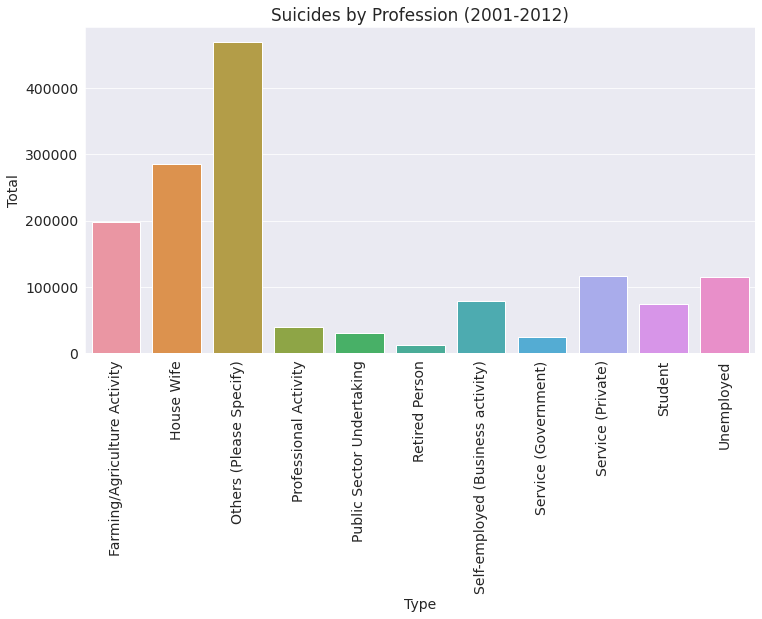

In [20]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Suicides by Profession (2001-2012)')
sns.barplot(x=top_profession.index, y=top_profession);

Analysis of the data reveals distinct patterns in the distribution of professions among individuals who have committed suicide. The category with the highest number of suicides is Housewives, indicating that individuals engaged in domestic responsibilities face a significant risk of suicide. Following closely is the category of Farming/Agricultural activity, highlighting the challenges and stressors faced by individuals in this profession. The Service (private) sector and unemployed individuals also demonstrate notable proportions among suicide cases.

It is worth noting that the category labeled as "Others (Please specify)" has been excluded from the analysis, as it lacks specific information to provide meaningful insights.

### Cause of the suicide
Examining the major causes of suicides provides valuable insights into the underlying factors contributing to these tragic incidents. By understanding the primary causes, we can identify areas where intervention and support systems can be targeted to prevent such occurrences in the future.

Analyzing the available data, several significant causes of suicide emerge. It is important to note that these causes may vary across different regions and populations. However, based on the provided dataset, some common major causes of suicide can be identified.

In [21]:
suicides_cause_df = suicide_cause_df[suicide_cause_df.Total != 0]
suicides_cause_df

,State,Year,Type,Gender,Age_group,Total
44,A & N ISLANDS,2003,Fall in Social Reputation,Male,0-14,1
45,A & N ISLANDS,2003,Family Problems,Male,15-29,5
52,A & N ISLANDS,2003,Suspected/Illicit Relation,Female,15-29,1
66,A & N ISLANDS,2004,Other Prolonged Illness,Male,30-44,4
85,A & N ISLANDS,2001,Insanity/Mental Illness,Male,30-44,3
...,...,...,...,...,...,...
237491,WEST BENGAL,2011,Family Problems,Male,45-59,512
237493,WEST BENGAL,2011,Not having Children(Barrenness/Impotency,Female,30-44,12
237494,WEST BENGAL,2011,Other Causes (Please Specity),Male,0-14,83
237496,WEST BENGAL,2011,Physical Abuse (Rape/Incest Etc.),Female,30-44,2


In [22]:
top_cause = suicides_cause_df.groupby('Type')['Total'].sum()
top_cause

Type
Bankruptcy or Sudden change in Economic            32755
Bankruptcy or Sudden change in Economic Status      2655
Cancellation/Non-Settlement of Marriage            11296
Cancer                                              9058
Causes Not known                                  237069
Death of Dear Person                               10321
Divorce                                             4133
Dowry Dispute                                      31970
Drug Abuse/Addiction                               30046
Failure in Examination                             27005
Fall in Social Reputation                          13464
Family Problems                                   341952
Ideological Causes/Hero Worshipping                 2118
Illegitimate Pregnancy                              2494
Illness (Aids/STD)                                  8723
Insanity/Mental Illness                            94229
Love Affairs                                       45039
Not having Children (Barre

As we can see, a specific value is repeated twice, we need to merge these two.

In [23]:
suicides_cause_df_copy = suicides_cause_df.copy()
suicides_cause_df_copy.loc[suicides_cause_df_copy['Type'] == 'Bankruptcy or Sudden change in Economic', 'Type'] = 'Bankruptcy or Sudden change in Economic Status'

In [24]:
top_cause = suicides_cause_df_copy.groupby('Type')['Total'].sum()
top_cause

Type
Bankruptcy or Sudden change in Economic Status     35410
Cancellation/Non-Settlement of Marriage            11296
Cancer                                              9058
Causes Not known                                  237069
Death of Dear Person                               10321
Divorce                                             4133
Dowry Dispute                                      31970
Drug Abuse/Addiction                               30046
Failure in Examination                             27005
Fall in Social Reputation                          13464
Family Problems                                   341952
Ideological Causes/Hero Worshipping                 2118
Illegitimate Pregnancy                              2494
Illness (Aids/STD)                                  8723
Insanity/Mental Illness                            94229
Love Affairs                                       45039
Not having Children (Barrenness/Impotency            766
Not having Children(Barren

We have merged the repeating values by creating a copy of the dataframe. Now, we can continue with our analysis.

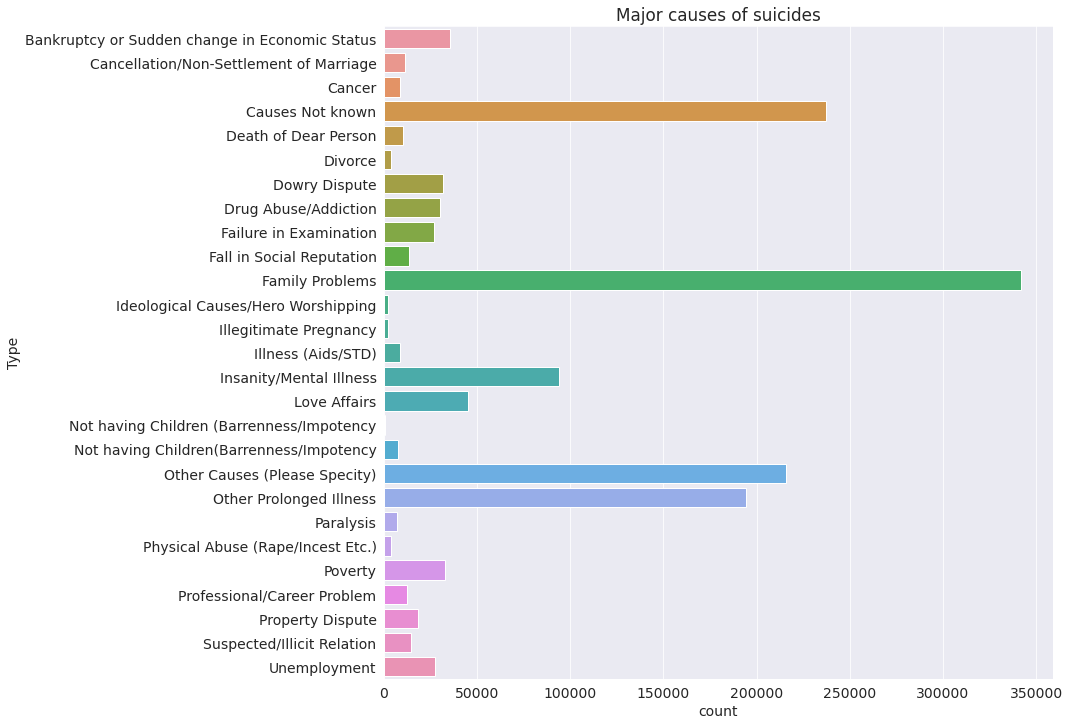

In [25]:
plt.figure(figsize=(12, 12))
sns.barplot(x=top_cause, y=top_cause.index)
plt.title("Major causes of suicides");
plt.xlabel('count');

The bar chart illustrates the distribution of major causes of suicides based on the provided data. 

From the chart, it is evident that there are several significant causes of suicides. Some of the notable causes include family problems, causes not known, other prolonged illnesses, and poverty. These causes exhibit higher frequencies compared to others in the dataset.

Family problems emerge as one of the leading causes, with a substantial number of suicides attributed to issues within familial relationships. Causes not known represent a considerable portion as well, indicating that in a significant number of cases, the underlying factors leading to suicide remain unidentified or unreported.

Other prolonged illnesses and poverty also contribute significantly to the occurrence of suicides, underscoring the impact of physical health challenges and socioeconomic hardships on individuals' mental well-being.

Additionally, the data reveals the prevalence of specific causes such as bankruptcy or sudden change in economic status, cancellation/non-settlement of marriage, cancer, death of a dear person, and drug abuse/addiction, among others.

Understanding the major causes of suicides highlighted in the chart is crucial for developing targeted interventions, prevention strategies, and support systems. Efforts to address mental health, improve access to healthcare services, alleviate financial distress, strengthen social support networks, and raise awareness about the impact of these causes can help in reducing the occurrence of suicides and promoting overall well-being in society.

In [26]:
jovian.commit(file='suicides_df')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "fkzaidi199/suicides-by-profession-in-india" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/fkzaidi199/suicides-by-profession-in-india


'https://jovian.com/fkzaidi199/suicides-by-profession-in-india'

### Age group
Analyzing the number of suicides based on age groups provides insights into the distribution of suicide cases across different stages of life. By examining this data, we can identify any notable patterns or trends that exist within specific age groups.

The dataset reveals the number of individuals committing suicide within different age groups. By assessing this information, we can gain a better understanding of which age cohorts may be more vulnerable to suicide

In [27]:
age_group = suicides_cause_df.groupby('Age_group')['Total'].sum()
age_group

Age_group
0-14      32685
15-29    509776
30-44    488713
45-59    294333
60+      115467
Name: Total, dtype: int64

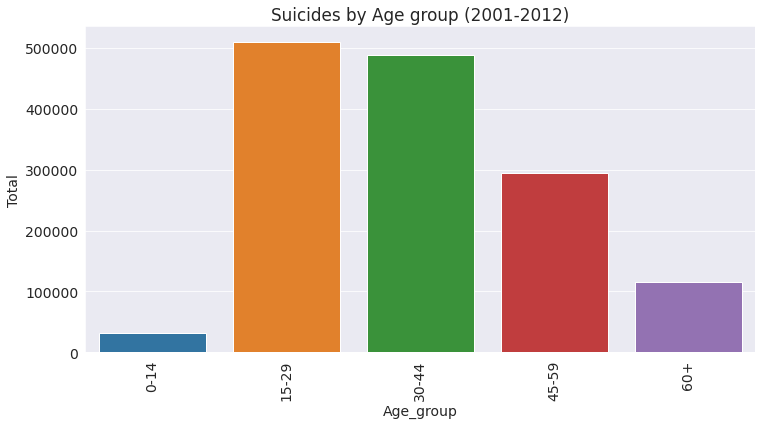

In [28]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Suicides by Age group (2001-2012)')
sns.barplot(x= age_group.index, y=age_group);

Analyzing the chart, we can observe the distribution of suicides across various age cohorts.

The age group with the highest number of suicides is 15-29 years, indicating that individuals in this age range are particularly vulnerable to suicidal behavior. This age group encompasses young adults and individuals in early adulthood, who may be facing significant life transitions, academic or career pressures, relationship challenges, or mental health issues.

Following closely is the age group of 30-44 years, suggesting that individuals in their prime working and family-building years also experience a significant number of suicides. Factors such as job-related stress, financial pressures, relationship difficulties, and the demands of balancing multiple responsibilities may contribute to the higher prevalence of suicides in this age range.

The age group of 45-59 years shows a relatively lower number of suicides compared to the previous age groups, indicating a potential decrease in suicide rates as individuals reach middle age. However, it is important to note that suicide is still a concern within this age group, and factors such as mid-life crises, health issues, and personal challenges may contribute to these cases.

The age group of 60+ represents individuals in their senior years, and while the number of suicides is lower compared to younger age groups, it is still a significant concern. Factors such as physical health decline, social isolation, bereavement, and mental health issues may contribute to the vulnerability of older adults to suicidal thoughts and actions.

Understanding the distribution of suicides across different age groups is crucial for developing targeted prevention strategies, promoting mental health support, and implementing age-appropriate interventions. By addressing the unique challenges and risk factors faced by individuals in each age cohort, we can work towards reducing the prevalence of suicides and enhancing overall well-being at various stages of life.

In [29]:
jovian.commit(file = 'suicides_df')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "fkzaidi199/suicides-by-profession-in-india" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/fkzaidi199/suicides-by-profession-in-india


'https://jovian.com/fkzaidi199/suicides-by-profession-in-india'

### Gender
Examining the gender distribution of individuals committing suicides provides insights into any potential disparities or patterns that exist within different gender groups. By analyzing this data, we can identify the relative proportions of male and female suicide cases and explore any underlying factors that may contribute to gender-related differences in suicidal behavior.

In [30]:
gender = suicides_cause_df.groupby('Gender')['Total'].sum()
gender

Gender
Female    517736
Male      923238
Name: Total, dtype: int64

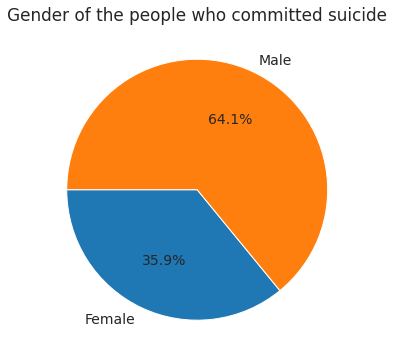

In [31]:
plt.figure(figsize=(12,6))
plt.title('Gender of the people who committed suicide')
plt.pie(gender, labels=gender.index, autopct='%1.1f%%', startangle=180);

Among the individuals who have taken their own lives, the data shows that females account for approximately 36% of the total cases, while males account for around 64%.

This gender disparity indicates that a higher proportion of males are affected by suicide compared to females.

The larger portion of males in the dataset suggests that men may be more vulnerable to suicidal tendencies or face unique challenges and risk factors that contribute to higher rates of suicide. 

### Social Status
To explore this data further, we can examine the number of suicides within each social status category. It is important to note that the specific social status categories may vary depending on the dataset. However, by observing the relative frequencies or counts of suicides within each category, we can identify any significant trends or disparities

In [32]:
suicides_social_df = suicide_social_df[suicide_social_df.Total != 0]
suicides_social_df

,State,Year,Type,Gender,Age_group,Total
107,A & N ISLANDS,2002,Never Married,Female,0-100+,17
134,A & N ISLANDS,2004,Never Married,Female,0-100+,15
151,A & N ISLANDS,2005,Married,Female,0-100+,35
334,A & N ISLANDS,2001,Married,Female,0-100+,38
385,A & N ISLANDS,2004,Married,Female,0-100+,26
...,...,...,...,...,...,...
236867,TRIPURA,2012,Seperated,Female,0-100+,14
237071,UTTAR PRADESH,2012,Married,Male,0-100+,1546
237377,WEST BENGAL,2004,Seperated,Female,0-100+,250
237487,WEST BENGAL,2010,Never Married,Female,0-100+,1766


In [33]:
social_status = suicides_social_df.groupby('Type')['Total'].sum()
social_status

Type
Divorcee             45816
Married            3065322
Never Married       954903
Seperated           115413
Widowed/Widower     186339
Name: Total, dtype: int64

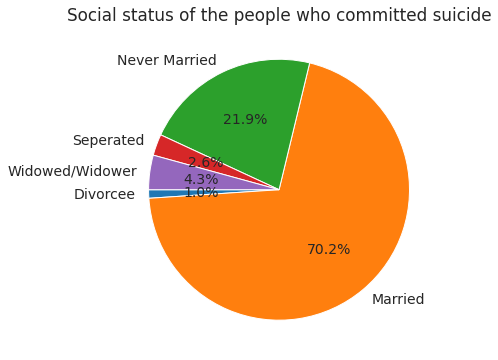

In [34]:
plt.figure(figsize=(12,6))
plt.title('Social status of the people who committed suicide')
plt.pie(social_status, labels=social_status.index, autopct='%1.1f%%', startangle=180);

Based on the available data, it is evident that the majority of individuals who committed suicide, approximately 70%, were married. This suggests that marital status may be a significant factor contributing to the prevalence of suicides. Additionally, around 21.9% of the suicides were individuals who had never been married. This category includes individuals who were single or not in a current marital relationship.

Furthermore, approximately 1% of the suicides were individuals who had gone through a divorce, indicating that the process of divorce may also play a role in suicidal tendencies. Additionally, 2.6% of the suicides were individuals who were separated, possibly indicating the emotional distress associated with relationship breakdown. Finally, approximately 4.3% of the suicides were individuals who were already widowed.

In [35]:
jovian.commit(file = 'suicides_df')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "fkzaidi199/suicides-by-profession-in-india" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/fkzaidi199/suicides-by-profession-in-india


'https://jovian.com/fkzaidi199/suicides-by-profession-in-india'

## Asking and answering questions

Now, let us ask a few interesting questions that can be answered using the dataset.

### **Q1:** Which year recorded the highest number of suicides? How has the number of suicides evolved over the years?

For conducting our analysis, we will utilize the dataset "suicides_cause_df" which provides comprehensive yearwise data on suicides. This dataset offers a valuable resource to explore and understand the dynamics of suicide rates over time.

In [36]:
yearwise_suicides = suicides_cause_df.groupby('Year')['Total'].sum()
yearwise_suicides

Year
2001    108506
2002    110417
2003    110851
2004    113697
2005    113914
2006    118112
2007    122637
2008    125017
2009    127151
2010    134599
2011    135585
2012    120488
Name: Total, dtype: int64

In [37]:
peak_year = yearwise_suicides.max()
year1 = yearwise_suicides.idxmax()
print('Year {} witnessed a maximum of {} suicides during 2001-2012.'.format(year1, peak_year))

Year 2011 witnessed a maximum of 135585 suicides during 2001-2012.


Let's draw a chart to see the trend of suicides over the years

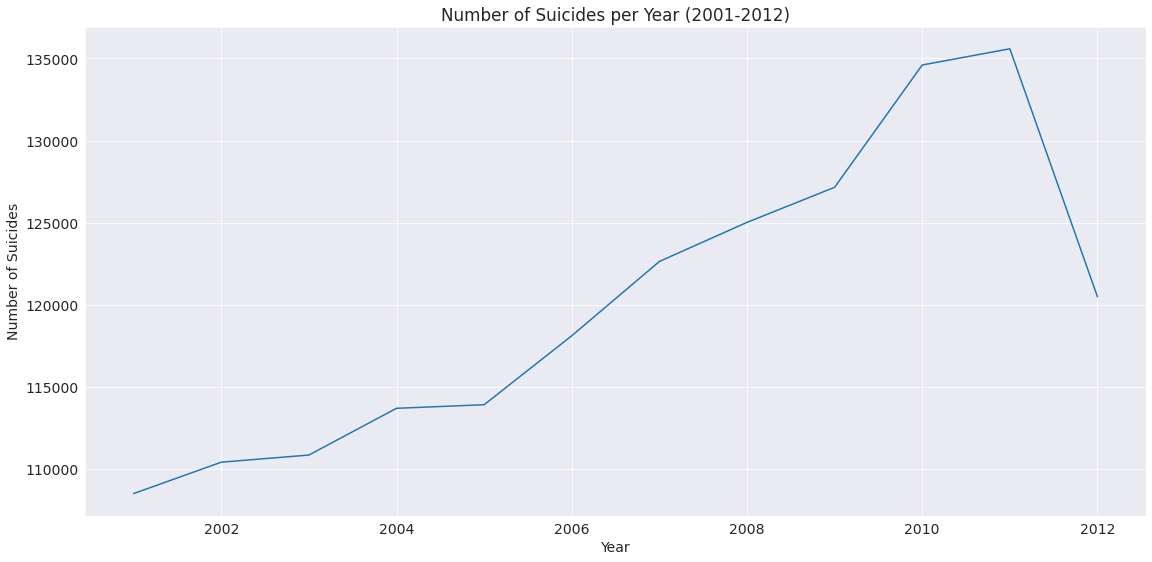

In [38]:
plt.figure(figsize = (19,9))
yearwise_suicides.plot(kind='line')

plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.title('Number of Suicides per Year (2001-2012)')

plt.show()

The data clearly indicates a notable increase in the number of suicides from 2001 to 2011. This upward trend suggests a concerning rise in the incidence of suicides over the analyzed time period. The data provides valuable insights into the evolving landscape of mental health and highlights the need for comprehensive strategies to address this pressing issue.

### **Q2:** Which states witnessed the highest number of suicides over the period? 

In [67]:
suicide_state = suicides_cause_df.groupby('State')['Total'].sum()
suicide_state

State
A & N ISLANDS          1623
ANDHRA PRADESH       162820
ARUNACHAL PRADESH      1328
ASSAM                 34469
BIHAR                  9245
CHANDIGARH             1034
CHHATTISGARH          60495
D & N HAVELI            686
DAMAN & DIU             279
DELHI (UT)            16857
GOA                    3475
GUJARAT               66177
HARYANA               29437
HIMACHAL PRADESH       5319
JAMMU & KASHMIR        2968
JHARKHAND              9950
KARNATAKA            146965
KERALA               107936
LAKSHADWEEP              10
MADHYA PRADESH        90307
MAHARASHTRA          180389
MANIPUR                 421
MEGHALAYA              1086
MIZORAM                 834
NAGALAND                347
ODISHA                53448
PUDUCHERRY             6429
PUNJAB                 9270
RAJASTHAN             51027
SIKKIM                 1924
TAMIL NADU           163813
TRIPURA                9194
UTTAR PRADESH         46680
UTTARAKHAND            3702
WEST BENGAL          161030
Name: Total, d

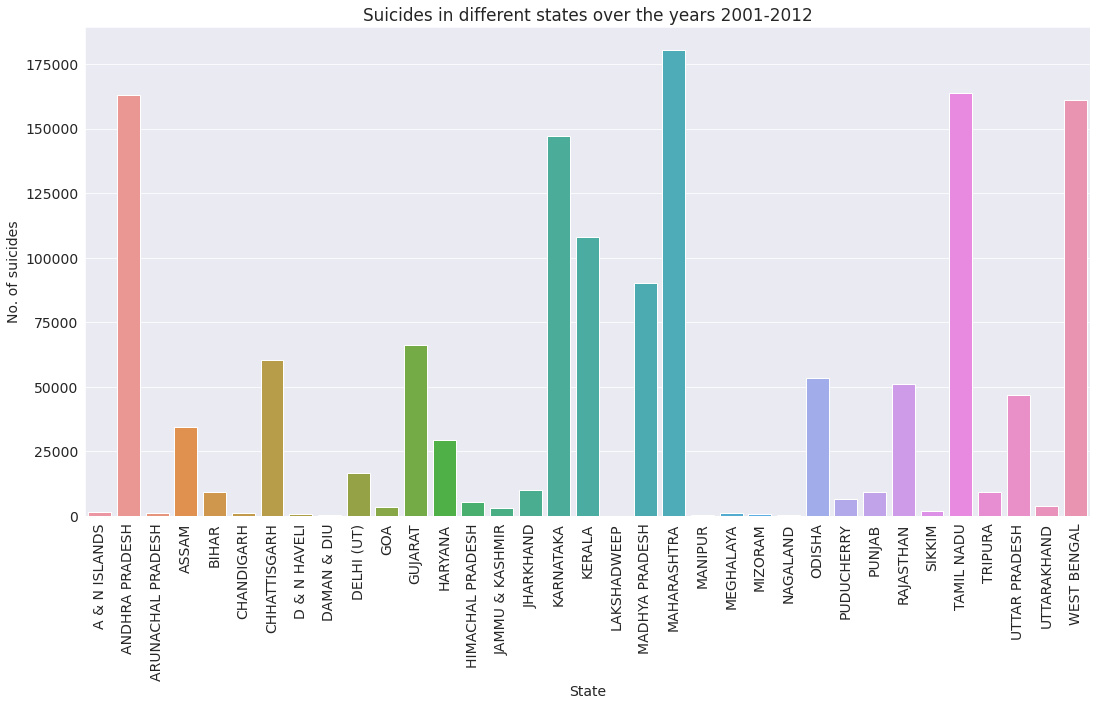

In [40]:
plt.figure(figsize = (18,9))

sns.barplot(x=suicide_state.index, y=suicide_state.values)

plt.xticks(rotation = 90)
plt.title('Suicides in different states over the years 2001-2012')
plt.xlabel('State')
plt.ylabel('No. of suicides')

plt.show()

In [41]:
max_suicide_state = suicide_state.max()
state1 = suicide_state.idxmax()

print('The maximum number of suicides were commited in {}. {} witnessed a total of {} suicides over the years 2001-2012.'.format(state1,state1, max_suicide_state))

The maximum number of suicides were commited in MAHARASHTRA. MAHARASHTRA witnessed a total of 180389 suicides over the years 2001-2012.


Top 5 states who witnessed most number of suicides are:

In [42]:
top_5states = suicide_state.sort_values(ascending = False).head(5)
top_5states

State
MAHARASHTRA       180389
TAMIL NADU        163813
ANDHRA PRADESH    162820
WEST BENGAL       161030
KARNATAKA         146965
Name: Total, dtype: int64

The bar chart illustrates the states that recorded the highest number of suicides during the period from 2001 to 2012. Among these states, Maharashtra reported the highest number, with a total of 180,389 suicides. Following closely behind are Tamil Nadu with 163,813 suicides, Andhra Pradesh with 162,820 suicides, West Bengal with 161,030 suicides, and Karnataka with 146,965 suicides.

This data provides valuable insights into the geographical distribution of suicides across different states in the given timeframe. It highlights specific regions where the prevalence of suicides appears to be relatively high. Understanding the variations in suicide rates among different states can inform targeted interventions, resource allocation, and the development of effective suicide prevention strategies at regional levels.

### **Q3:** What is the educational status of individuals who commit suicides? Is there a visible relation between higher education and lower suicide rates?

To answer these questions, we can analyze the educational status of individuals who have committed suicides and explore any potential relationship between educational attainment and suicide rates.

In [43]:
suicides_education_df = suicide_education_df[suicide_education_df.Total != 0]
suicides_education_df

,State,Year,Type,Gender,Age_group,Total
70,A & N ISLANDS,2004,Hr. Secondary/Intermediate/Pre-Universit,Female,0-100+,5
196,A & N ISLANDS,2003,Hr. Secondary/Intermediate/Pre-Universit,Male,0-100+,4
197,A & N ISLANDS,2003,Middle,Male,0-100+,42
209,A & N ISLANDS,2004,Hr. Secondary/Intermediate/Pre-Universit,Male,0-100+,9
224,A & N ISLANDS,2005,Middle,Male,0-100+,37
...,...,...,...,...,...,...
237265,UTTARAKHAND,2011,Graduate,Female,0-100+,10
237266,UTTARAKHAND,2011,Hr. Secondary/Intermediate/Pre-Universit,Female,0-100+,16
237267,UTTARAKHAND,2011,Post Graduate and Above,Male,0-100+,4
237367,WEST BENGAL,2004,Hr. Secondary/Intermediate/Pre-Universit,Male,0-100+,873


In [44]:
education_suicides = suicides_education_df.groupby('Type').Total.sum()
education_suicides

Type
Diploma                                       42459
Graduate                                      93822
Hr. Secondary/Intermediate/Pre-Universit     356724
Matriculate/Secondary                        769698
Middle                                      1028913
No Education                                 965271
Post Graduate and Above                       22425
Primary                                     1088481
Name: Total, dtype: int64

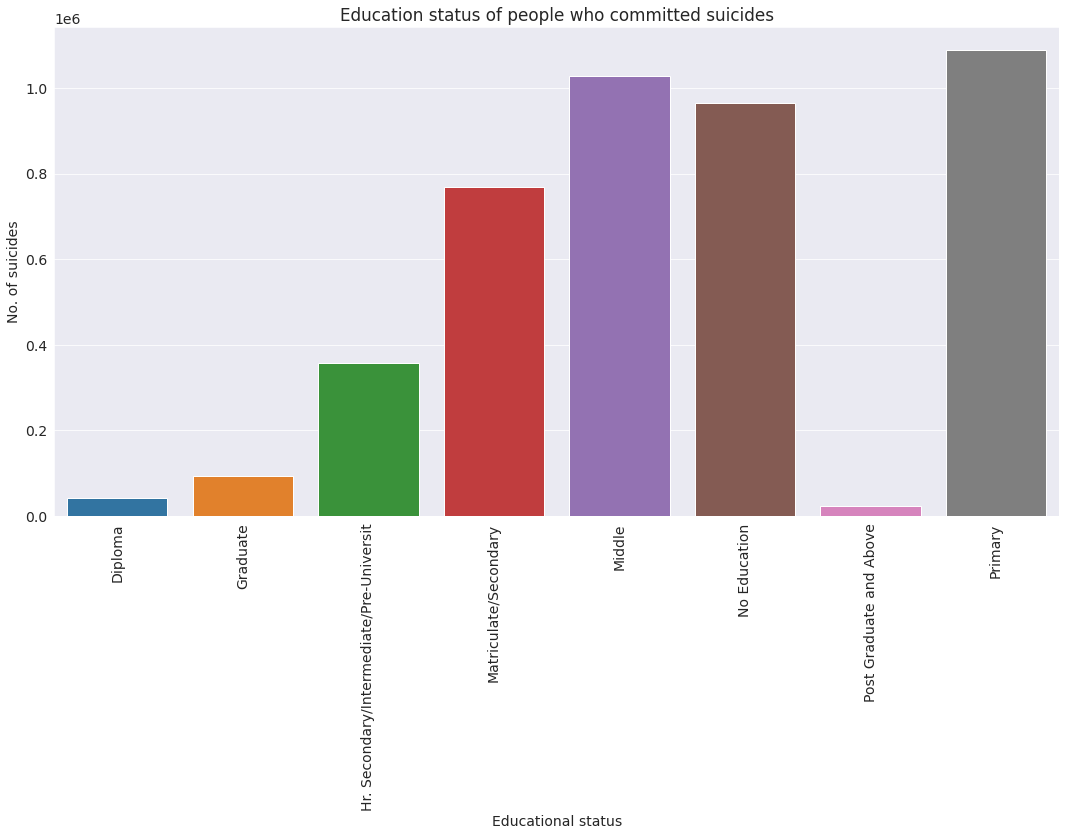

In [45]:
plt.figure(figsize = (18,9))

sns.barplot(x=education_suicides.index, y=education_suicides)

plt.xticks(rotation = 90)
plt.title('Education status of people who committed suicides')
plt.xlabel('Educational status')
plt.ylabel('No. of suicides')

plt.show();

Low or no education categories consistently showed a high number of suicides throughout the years, while individuals with higher education reported a significantly lower number of suicides. This trend was particularly notable among those with a postgraduate or above education level, where the number of suicides was exceptionally low. Possible factors contributing to this pattern include increased income associated with education and heightened awareness regarding mental health issues.

In [46]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "fkzaidi199/suicides-by-profession-in-india" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/fkzaidi199/suicides-by-profession-in-india


'https://jovian.com/fkzaidi199/suicides-by-profession-in-india'

### **Q4:** Can we observe any patterns or changes in the gender distribution of individuals who committed suicides over the years?

In [47]:
suicides_male_df = suicides_cause_df.drop(columns = ['State', 'Type', 'Age_group'])

In [48]:
suicides_male_df1 = suicides_male_df[suicides_male_df.Gender == 'Male'].groupby('Year').sum()
suicides_male_df1

,Total
Year,
2001,66314
2002,69332
2003,70221
2004,72651
2005,72916
2006,75702
2007,79295
2008,80544
2009,81471


In [49]:
suicides_female_df1 = suicides_male_df[suicides_male_df.Gender == 'Female'].groupby('Year').sum()
suicides_female_df1

,Total
Year,
2001,42192
2002,41085
2003,40630
2004,41046
2005,40998
2006,42410
2007,43342
2008,44473
2009,45680


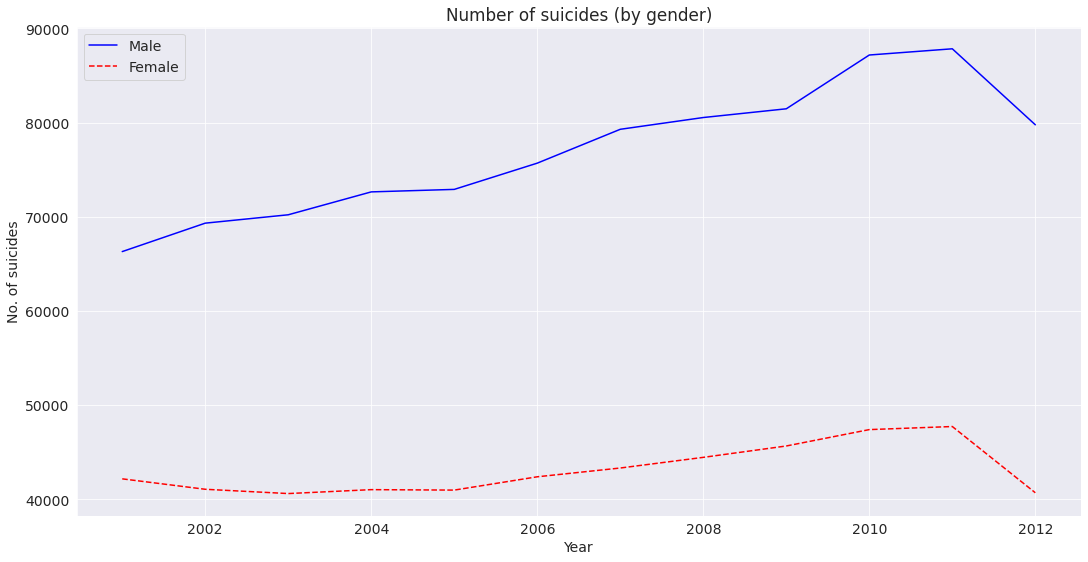

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 9))

plt.plot(suicides_male_df1.index, suicides_male_df1, 'b-')
plt.plot(suicides_female_df1.index, suicides_female_df1, 'r--')

plt.xlabel('Year')
plt.ylabel('No. of suicides')
plt.title('Number of suicides (by gender)')
plt.legend(['Male', 'Female'])

plt.show()


The line chart represents the number of suicides per year categorized by gender. The data shows the yearly count of suicides for males and females from 2001 to 2012.

For male suicides, there is a general upward trend observed from 2001 to 2010, with a slight decline in 2011 and 2012. The numbers steadily increase from 66,314 in 2001 to reach a peak of 87,839 in 2011, before decreasing to 79,773 in 2012.

In contrast, the trend for female suicides exhibits a relatively stable pattern with some fluctuations. The numbers remain relatively consistent, ranging from 41,192 in 2001 to 47,746 in 2011, before decreasing to 40,715 in 2012.

Overall, the data suggests that male suicides consistently outnumber female suicides throughout the analyzed period.

In [51]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "fkzaidi199/suicides-by-profession-in-india" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/fkzaidi199/suicides-by-profession-in-india


'https://jovian.com/fkzaidi199/suicides-by-profession-in-india'

### **Q5:** What is the count of suicides per age group? Additionally, are there any noteworthy observations or trends apparent from the graph?

In [63]:
count_age_group = suicides_cause_df.groupby(['Age_group','Gender'])['Total'].sum()
count_age_group

Age_group  Gender
0-14       Female     16430
           Male       16255
15-29      Female    233007
           Male      276769
30-44      Female    158394
           Male      330319
45-59      Female     77213
           Male      217120
60+        Female     32692
           Male       82775
Name: Total, dtype: int64

In [64]:
pivot_table = count_age_group.unstack()
pivot_table

Gender,Female,Male
Age_group,,
0-14,16430,16255
15-29,233007,276769
30-44,158394,330319
45-59,77213,217120
60+,32692,82775


In [65]:
pivot_table['Male/female_ratio'] = pivot_table.Male/pivot_table.Female
pivot_table

Gender,Female,Male,Male/female_ratio
Age_group,,,
0-14,16430,16255,0.989349
15-29,233007,276769,1.187814
30-44,158394,330319,2.085426
45-59,77213,217120,2.811962
60+,32692,82775,2.531965


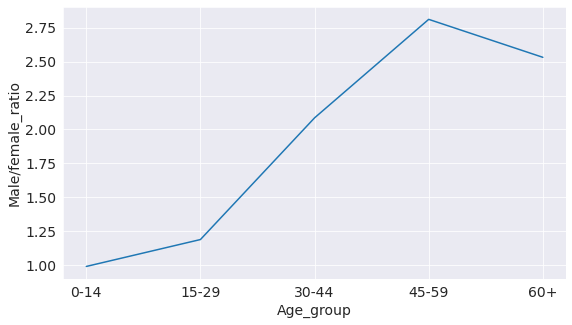

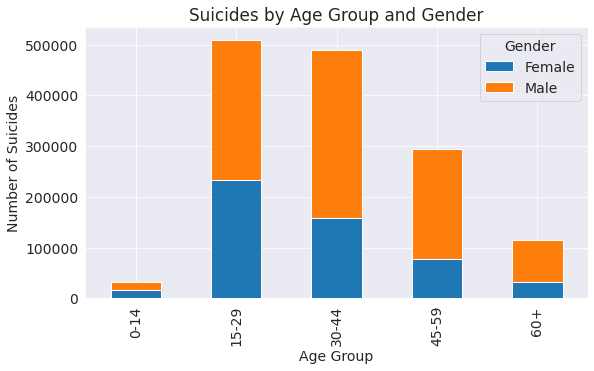

In [66]:
# Create the bar chart
sns.lineplot(data=pivot_table, x='Age_group', y='Male/female_ratio')
pivot_table = pivot_table.drop(columns = ['Male/female_ratio'])
pivot_table.plot(kind='bar', stacked=True)

# Set the chart title and axis labels
plt.title('Suicides by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Suicides')

# Display the chart
plt.show()

The graph clearly illustrates that as the age of individuals increases, the ratio of male to female suicides also increases. This indicates a higher likelihood of men committing suicide compared to women. In other words, as individuals get older, the disparity between male and female suicide rates becomes more pronounced, with men being more prone to suicide.

The increasing trend in the male-to-female ratio suggests that factors influencing suicide may differ between genders and evolve over the course of one's life. Understanding these underlying factors becomes crucial in developing targeted interventions and support systems to address the higher risk of suicide among men, particularly as they age.

It is essential to emphasize that the graph highlights a correlation between age, gender, and suicide rates, but it does not provide a complete understanding of the complex reasons behind these patterns. Additional research and analysis are necessary to delve deeper into the underlying causes and potential contributing factors to the observed gender disparity in suicide rates.

In [56]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "fkzaidi199/suicides-by-profession-in-india" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/fkzaidi199/suicides-by-profession-in-india


'https://jovian.com/fkzaidi199/suicides-by-profession-in-india'

### **Q5:** What are the primary methods of suicide chosen by males and females? Are there any notable differences between the methods adopted by each gender?

In [57]:
suicides_means_df = suicide_means_df[suicide_means_df.Total != 0]
suicides_means_df

,State,Year,Type,Gender,Age_group,Total
9,A & N ISLANDS,2001,By Fire/Self Immolation,Female,30-44,1
10,A & N ISLANDS,2001,By Hanging,Female,45-59,4
32,A & N ISLANDS,2002,By Hanging,Female,30-44,8
73,A & N ISLANDS,2004,By Drowning,Male,45-59,1
120,A & N ISLANDS,2003,By Other means (please specify),Male,45-59,1
...,...,...,...,...,...,...
237478,WEST BENGAL,2010,By Jumping from (Building),Male,45-59,31
237480,WEST BENGAL,2010,By Other means (please specify),Female,60+,70
237499,WEST BENGAL,2011,By Fire/Self Immolation,Female,30-44,84
237500,WEST BENGAL,2011,By Jumping off Moving Vehicles/Trains,Male,15-29,14


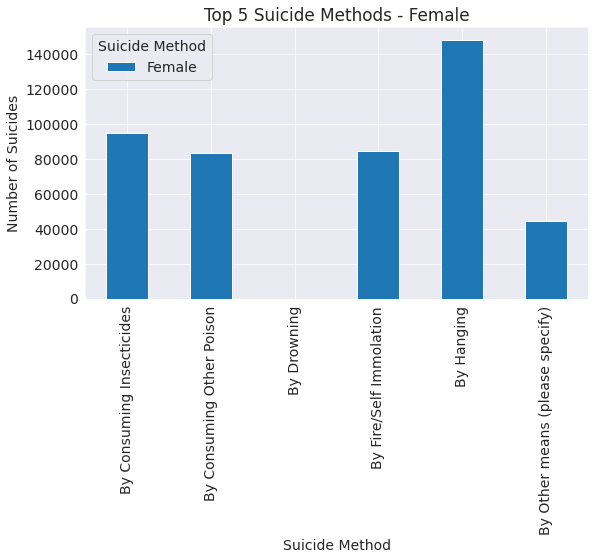

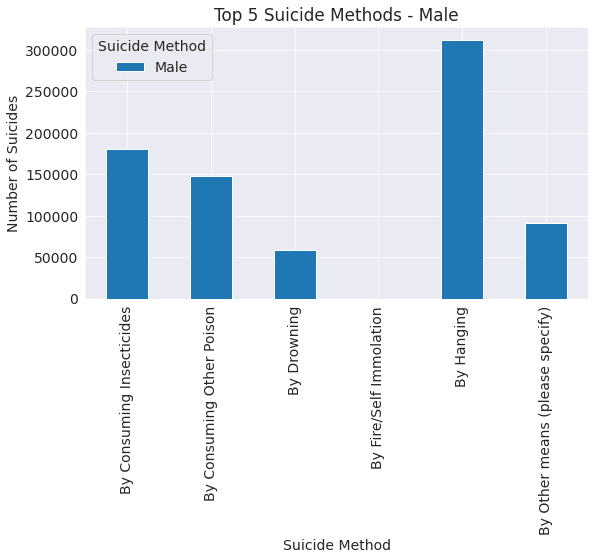

In [58]:
# Grouping the data by gender and suicide method, and calculating the sum of suicides for each method
method_distribution = suicides_means_df.groupby(['Gender', 'Type'])['Total'].sum().reset_index()

# Get the top 5 suicide methods for each gender
top_methods = method_distribution.groupby('Gender').apply(lambda x: x.nlargest(5, 'Total')).reset_index(drop=True)

# Pivot the data to create a matrix with genders as rows and the top 5 suicide methods as columns
pivot_table = top_methods.pivot_table(values='Total', index='Gender', columns='Type', fill_value=0)

# Plot stacked bar charts for each gender
for gender in pivot_table.index:
    pivot_table.loc[gender].plot(kind='bar', stacked=True)
    plt.title(f'Top 5 Suicide Methods - {gender}')
    plt.xlabel('Suicide Method')
    plt.ylabel('Number of Suicides')
    plt.legend(title='Suicide Method')
    plt.show()

The analysis of the data reveals that suicide by hanging is the predominant method chosen by both males and females. The second most commonly adopted means is consuming insecticides, which is consistent across genders. Additionally, consuming poison ranks third among both males and females. These findings suggest that there is no significant difference in the suicide methods chosen by males and females.

By examining the dataset, we observe that the top three suicide methods remain consistent regardless of gender. This indicates that the choice of means for suicide does not vary significantly between males and females. The prevalence of hanging, consuming insecticides, and consuming poison as the leading methods highlights a similarity in the factors influencing suicide decisions among different genders.

It is important to note that this analysis is based on the available data and may not capture the complete picture. Further research and analysis may be needed to explore additional factors and understand the underlying reasons behind the choice of suicide methods in different gender groups.

In [59]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "fkzaidi199/suicides-by-profession-in-india" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/fkzaidi199/suicides-by-profession-in-india


'https://jovian.com/fkzaidi199/suicides-by-profession-in-india'

## Inferences and Conclusion

Through the analysis conducted using the provided data, several insights and conclusions can be drawn regarding suicides across different categories.

1. Age Group Analysis: The data shows variations in the number of suicides across different age groups. As individuals progress into higher age groups, the male-to-female ratio of suicides tends to increase, indicating a higher likelihood of males committing suicide compared to females. However, further analysis is needed to understand the underlying factors influencing these trends.

2. Gender Analysis: The gender distribution of suicides reveals a higher number of male suicides compared to females. However, it is important to consider other factors and contexts that contribute to these differences.

3. Means of Suicide: The major means adopted for suicides, such as hanging, consuming insecticides, and consuming poison, remain consistent across genders. This suggests that there is no significant difference in the methods chosen by males and females.

4. Educational Status: Low or no education categories consistently showed a high number of suicides, while individuals with higher education reported a significantly lower number of suicides. This highlights the potential role of education in reducing suicide rates.

5. Regional Analysis: Maharashtra, Tamil Nadu, Andhra Pradesh, West Bengal, and Karnataka are identified as states with the highest number of suicides over the given period. These insights could be valuable for targeted interventions and support programs in these regions.

6. Trends Over Time: The analysis of suicide counts over the years reveals an increasing trend from 2001 to 2011. This trend underscores the need for continued efforts in mental health awareness, prevention, and support services.

In conclusion, the analysis provides valuable insights into the patterns, trends, and factors associated with suicides across various categories. It underscores the importance of addressing mental health issues, promoting education, and implementing targeted interventions to prevent suicides and provide support to those in need. However, it is crucial to conduct further research and analysis to gain a more comprehensive understanding of the underlying causes and develop effective strategies for suicide prevention.

## References and future work

Exploration of the provided dataset opens up several avenues for future projects and research. Here are some ideas for potential projects based on this dataset:

1. Time-Series Analysis: Conduct a more detailed time-series analysis to identify specific trends, patterns, and potential factors influencing suicide rates over the years. This could involve analyzing seasonal variations, long-term trends, and the impact of socio-economic factors.

2. Correlation Analysis: Explore the correlations between various variables in the dataset, such as education, profession, and causes of suicide. Identify potential relationships and factors that contribute to suicidal tendencies, enabling a better understanding of risk factors and prevention strategies.

3. Geospatial Analysis: Utilize geospatial techniques to map and visualize the geographical distribution of suicides. Analyze spatial patterns and identify regions with high suicide rates, helping policymakers target interventions and resources effectively.

4. Comparative Analysis: Compare suicide rates and patterns across different demographic factors, such as age, gender, education, and profession. Identify disparities and variations to develop targeted interventions for vulnerable groups.

5. Machine Learning Models: Employ machine learning algorithms to develop predictive models for identifying individuals at high risk of suicide. Incorporate various features from the dataset and other relevant data sources to enhance prediction accuracy.

Resources that may be helpful for these future projects include:

1. World Health Organization (WHO): The WHO provides comprehensive data, reports, and resources on suicide prevention and mental health. Their website contains valuable information for conducting research in this field. (Website: https://www.who.int/mental_health/prevention/suicide/en/)

2. National Institute of Mental Health (NIMH): NIMH offers research insights, data, and resources related to mental health and suicide prevention. Their website provides access to publications, studies, and statistical data. (Website: https://www.nimh.nih.gov/)

3. Suicide Prevention Resource Center (SPRC): SPRC is a leading organization dedicated to suicide prevention. Their website offers research articles, toolkits, and resources that can support project development and implementation. (Website: https://www.sprc.org/)

4. Open Data Platforms: Explore open data platforms such as data.gov and Kaggle, which offer a wide range of datasets related to suicide rates, mental health, and associated factors. These platforms can provide additional datasets for comparative analysis and cross-validation.

Remember to ensure ethical considerations when conducting research related to sensitive topics like suicide. Adhere to data privacy guidelines and seek appropriate approvals before utilizing and sharing the data.

In [71]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "fkzaidi199/suicides-by-profession-in-india" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/fkzaidi199/suicides-by-profession-in-india


'https://jovian.com/fkzaidi199/suicides-by-profession-in-india'